# Fractal Basins of Attraction

Author: Alejandro C. Parra Garcia

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Center Plot
# Code from: https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

For equation: f(z) = z^4-1

Zeros of the equation:

z0 =  1+0j

z1 = -1+0j

z2 =  0+1j

z3 =  0-1j


In [3]:
z0 = 1+0j
z1 = -1+0j
z2 = 0+1j
z3 = 0-1j 

x_coordinates = [1, -1, 0, 0]
y_coordinates = [0, 0, 1, -1]
names= ["z0","z1","z2","z3"]

ROOT_COLORS_BRIGHT = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]
ROOT_COLORS = ["#440154", "#3b528b", "#21908c", "#5dc963"]



In [4]:
# function: x^4-1
def f_x(x):
    return (x**4)-1

# derivative 4*x^3
def f_x_der(x):
    return 4*(x**3)


In [5]:
# function: x - f(x)/f'(x)
def newton_iteration(x):
    # Calculate the derivate
    derivate=f_x_der(x)
    
    # If derivate is 0, then error
    if(derivate == 0+0j):
        return None
    return x-(f_x(x)/derivate)

In [6]:
# Iterate n times or until the change is smaller than 1e-4
# each iteration apply newton_iteration() funtion
def iterations(x,n=10,e=1e-4):
    n_value=x
    for i in range(n):
        # Calculate next iteration
        n_value_1 = newton_iteration(n_value)
        
        # There was no solution
        if(n_value_1 is None):
            return None
        
        #Print Iteration and Value
        #print("Iteration " + str(i) + ": " + str(n_value_1))
        
        #Evaluate the error
        if( abs(n_value_1-n_value) < e ):
            return n_value_1
        
        #Update the value
        n_value = n_value_1
    
    return None

# Round a complex number
def round_complex_number(x):
    return complex(round(x.real),round(x.imag))

We are going to plot the numbers between -1 <= real(z) <=1, and -1 <= imaginary(z) <=1

The greed is dimension_x x dimension_y

In [7]:
def generate_points(n_iteration=10, e=1e-4, dimension_x=1000, dimension_y=1000, range_x=[-1,1], range_y=[-1,1]):
    start_time = time.time()
    
    data=[]
    # Calculate the lenght of the axis
    range_xx=range_x[1]-range_x[0]
    range_yy=range_y[1]-range_y[0]
    #print(range_xx)
    #print(range_yy)
    
    # Split the range into dimension_ sections
    step_x=range_xx/dimension_x
    step_y=range_yy/dimension_y
    #print(step_x)
    #print(step_y)
    
    for x in range(dimension_x):
        start_x = round(range_x[0] + step_x*x, 15)
        #print("start_x: ",start_x)
        for y in range(dimension_y):
            start_y = round(range_y[0] + step_y*y, 15)
            #print("start_y: ",start_y)
            
            #Create the Complex Number
            complex_number=complex(start_x,start_y)
            #print("Complex number: ",complex_number)
            
            # We run Newtons method for the given complex number
            res = iterations(complex_number, n = n_iteration, e = e)
            
            converges = False
            converge_to = None
            color = None
            if(res is not None):
                # It has converge
                converges = True
                converge_to = round_complex_number(res)
                if(converge_to == z0):
                    color=ROOT_COLORS[0]
                elif(converge_to == z1):
                    color=ROOT_COLORS[1]
                elif(converge_to == z2):
                    color=ROOT_COLORS[2]
                elif(converge_to == z3):
                    color=ROOT_COLORS[3]
                else:
                    print("-----------ERROR-----------")
                    return (-1)
                
            # Add data to the List
            data.append([complex_number,start_x,start_y, converges, converge_to, color])
            #break
        #break
    # Create the pandas DataFrame
    df = pd.DataFrame(data, columns = ['complex_number', 'real_part','imaginary_part', 'converges', 'converge_to', 'color'])
    
    print("--- %s seconds ---" % (time.time() - start_time))
    
    return df

In [8]:
def plot_points(dataframe, range_x=[-1,1], range_y=[-1,1]):
    # Show extra on all sides of the plot
    extra_plot=0.1
    
    
    
    # Set dimensions of the plot
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plot the points that converges
    ax.scatter(df[df.converges].real_part, df[df.converges].imaginary_part, c=df[df.converges].color)
    

    # Plot the solutions
    ax.scatter(x_coordinates, y_coordinates,s= 150, c=ROOT_COLORS_BRIGHT)
    for i, txt in enumerate(names):
        ax.annotate(txt, (x_coordinates[i], y_coordinates[i]), xytext =(x_coordinates[i]+((range_x[1]-range_x[0])/100), y_coordinates[i]), fontsize=20 )
    
    # Fix X axis
    plt.xlim( (range_x[0] - extra_plot), (range_x[1] + extra_plot) )
    # Fix Y axis
    plt.ylim( (range_y[0] - extra_plot), (range_y[1] + extra_plot) )
    # Add X label
    plt.xlabel("Real")
    # Add Y label
    plt.ylabel("Imaginary")

## Run the code

**Modify the variables to change the behavior of the resulting graph**

In [9]:
# Variables: 
iteration=20
error=1e-4
points_on_X=1000
points_on_y=1000
range_of_x=[-2,2]
range_of_y=[-2,2]

In [10]:
# Run the code
df=generate_points(n_iteration=iteration, e=error, dimension_x=points_on_X, dimension_y=points_on_y, range_x=range_of_x, range_y=range_of_y)

--- 29.75088667869568 seconds ---


**Plot the results**

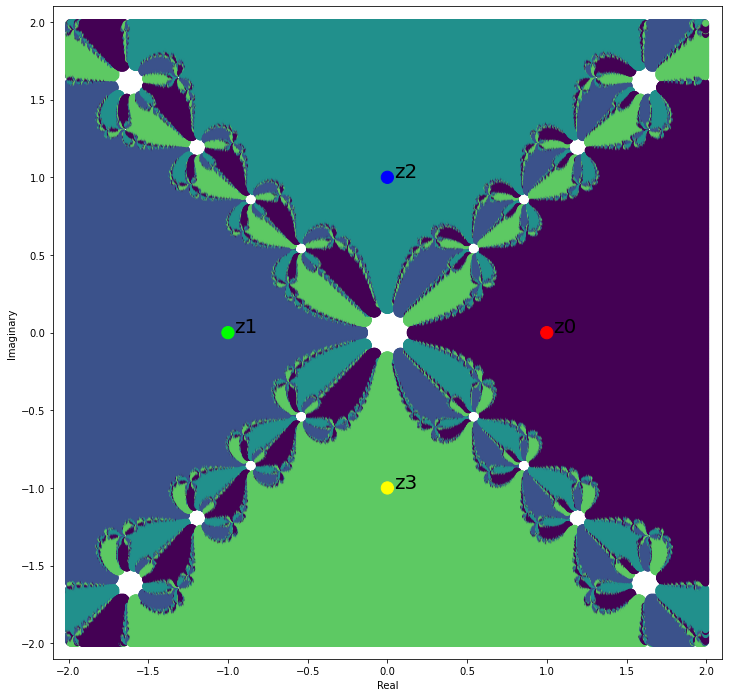

In [11]:
plot_points(df, range_x = range_of_x, range_y = range_of_y)

See the resulting values

In [12]:
print("Total Number of points evaluated: ", df.shape[0])
print("total Number of points that converge: ", df[df.converges].shape[0])
print("% of points that converge: ", df[df.converges].shape[0]/df.shape[0])

df

Total Number of points evaluated:  1000000
total Number of points that converge:  942954
% of points that converge:  0.942954


,complex_number,real_part,imaginary_part,converges,converge_to,color
0,-2.000-2.000j,-2.000,-2.000,False,N000a000N,None
1,-2.000-1.996j,-2.000,-1.996,False,N000a000N,None
2,-2.000-1.992j,-2.000,-1.992,False,N000a000N,None
3,-2.000-1.988j,-2.000,-1.988,True,-1.0+0.0j,#3b528b
4,-2.000-1.984j,-2.000,-1.984,True,-1.0+0.0j,#3b528b
...,...,...,...,...,...,...
999995,1.996+1.980j,1.996,1.980,True,1.0+0.0j,#440154
999996,1.996+1.984j,1.996,1.984,True,1.0+0.0j,#440154
999997,1.996+1.988j,1.996,1.988,True,1.0+0.0j,#440154
999998,1.996+1.992j,1.996,1.992,True,0.0-1.0j,#5dc963
